### Data exploration, feature engineering и prediction с линейна регресия.

### Разгледан [dataset](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/data) от Kaggle съдържа информация за атрибутите на над 17 хиляди футболисти в играта Fifa 18.

Нека първо добавим нужните библиотеки и други неща.

In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

warnings.filterwarnings('ignore')

pd.options.display.max_rows = 20

Целият dataset съдържа 4 файла. Ние ще използваме *CompleteDataset.csv*

Нека да заредим и видим данните.

In [2]:
data = pd.read_csv('../data/CompleteDataset.csv', index_col=0, low_memory=False)
data

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€92M,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,€90.5M,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€79M,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,€77M,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


Нека видим какви колони имаме и какви са техните стойности.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 74 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null object
Curve                  17981 non-null ob

Нека проверим за NaN/Null стойности.

In [4]:
data.isnull().sum().sort_values()

Name                   0
GK positioning         0
GK reflexes            0
Heading accuracy       0
Interceptions          0
Jumping                0
Long passing           0
Long shots             0
Marking                0
Penalties              0
                    ... 
LCB                 2029
LB                  2029
LAM                 2029
CM                  2029
CDM                 2029
CB                  2029
CAM                 2029
RWB                 2029
LS                  2029
ST                  2029
Length: 74, dtype: int64

Доста постоянно число на липсващи данни.

In [5]:
2029 / data.shape[0]

0.11284133251765753

Около 11%. От първото принтиране на данните забелязваме, че записите на индекси 4 и 6 съдържат NaN. Това са [M. Neuer](https://en.wikipedia.org/wiki/Manuel_Neuer) и [de Gea](https://en.wikipedia.org/wiki/David_de_Gea), които са вратари. Дали това не важи за всички вратари?

In [6]:
data.loc[data['Preferred Positions'] == 'GK ']

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,T. Courtois,25,https://cdn.sofifa.org/48/18/players/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,92,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,€59M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,G. Buffon,39,https://cdn.sofifa.org/48/18/players/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,€4.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,J. Oblak,24,https://cdn.sofifa.org/48/18/players/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,88,93,Atlético Madrid,https://cdn.sofifa.org/24/18/teams/240.png,€57M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,H. Lloris,30,https://cdn.sofifa.org/48/18/players/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,€38M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,S. Handanovič,32,https://cdn.sofifa.org/48/18/players/162835.png,Slovenia,https://cdn.sofifa.org/flags/44.png,87,87,Inter,https://cdn.sofifa.org/24/18/teams/44.png,€29M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,P. Čech,35,https://cdn.sofifa.org/48/18/players/48940.png,Czech Republic,https://cdn.sofifa.org/flags/12.png,86,86,Arsenal,https://cdn.sofifa.org/24/18/teams/1.png,€10.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,K. Navas,30,https://cdn.sofifa.org/48/18/players/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,85,85,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€24.5M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,D. Subašić,32,https://cdn.sofifa.org/48/18/players/192593.png,Croatia,https://cdn.sofifa.org/flags/10.png,85,85,AS Monaco,https://cdn.sofifa.org/24/18/teams/69.png,€22M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Точно 2029. Явно всички вратари нямат рейтинг за различните позиции. Доста трудно бихме попълнили тези колони. Нека се ограничим до използването на качесвените характеривики за всеки футболист.

Това са следните колони от Acceleration до Volleys.

Нека си ги запишем в някаква променлива.

In [7]:
data.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [8]:
attributes = ['Acceleration', 'Aggression', 'Agility', 'Balance',  'Ball control', 'Composure', 
             'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 
             'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 
             'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 
             'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
             'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

Целта ни е на база на тези качества за всеки футболист да предвидим неговия рейтинг (Overall). Нека видим разпределението на Overall.

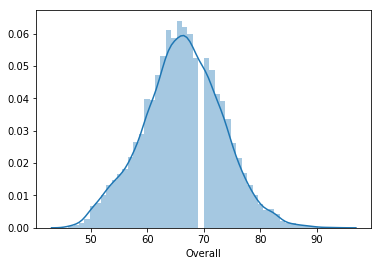

In [9]:
sns.distplot(data['Overall'])

Изглежда доста равномерно разпределено. Да видим атрибутите.

In [10]:
data[attributes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 34 columns):
Acceleration          17981 non-null object
Aggression            17981 non-null object
Agility               17981 non-null object
Balance               17981 non-null object
Ball control          17981 non-null object
Composure             17981 non-null object
Crossing              17981 non-null object
Curve                 17981 non-null object
Dribbling             17981 non-null object
Finishing             17981 non-null object
Free kick accuracy    17981 non-null object
GK diving             17981 non-null object
GK handling           17981 non-null object
GK kicking            17981 non-null object
GK positioning        17981 non-null object
GK reflexes           17981 non-null object
Heading accuracy      17981 non-null object
Interceptions         17981 non-null object
Jumping               17981 non-null object
Long passing          17981 non-null object
Long shots 

Очаквахме числови стойности, а колоните са от тип object.
Нека видим какви стойности се съдържат в произволна колона.

In [11]:
data['Jumping'].unique()

array(['95', '68', '61', '69', '78', '84', '67', '59', '32', '79', '93',
       '65', '85', '80', '89', '75', '76', '87', '77', '52', '74', '64',
       '57', '82', '88', '71', '44', '66', '70', '54', '81', '72', '83',
       '60', '34', '51', '53', '73', '62', '63', '92', '86', '46', '48',
       '94', '56', '90', '38', '58', '49', '55', '30', '39', '50', '40',
       '41', '42', '43', '74+1', '33', '45', '36', '91', '35', '76-4',
       '37', '47', '67+2', '65+2', '73-8', '31', '59+1', '77-4', '78+1',
       '86+1', '59+2', '80-2', '68+1', '76+4', '26', '68-1', '81+2',
       '76-5', '72+4', '63+2', '67-2', '75-6', '29', '73-3', '70+14', '27',
       '70-3', '66-1', '64+4', '25', '28', '82+6', '75-4', '74+4', '73-4',
       '78-2', '72-1', '68+7', '60+1', '77-2', '79+2', '64+2', '67+8',
       '74+7', '65+1', '68+6', '64-4', '59-1', '76-3', '66-3', '69+7',
       '63+1', '77+2', '57+4', '62+1', '70-2', '71+2', '67+16', '71+9',
       '87+2', '66+2', '76-2', '13', '46+2', '70+1', '68+

Явно някой не си е сметнал стойностите.
Нека преобразуваме колоните до числов тип. Но преди това проверка за NaN/Null.

In [12]:
player_attributes_df = data[attributes]

player_attributes_df.isnull().sum().sort_values()

Acceleration          0
Strength              0
Standing tackle       0
Stamina               0
Sprint speed          0
Sliding tackle        0
Shot power            0
Short passing         0
Reactions             0
Positioning           0
                     ..
Vision                0
Curve                 0
Finishing             0
Free kick accuracy    0
GK diving             0
GK handling           0
GK kicking            0
GK positioning        0
Dribbling             0
Volleys               0
Length: 34, dtype: int64

In [13]:
for attribute in player_attributes_df.columns:
    player_attributes_df[attribute] = player_attributes_df[attribute].apply(lambda x: eval(str(x)))

Нека проверим дали колоните вече съдържат числови стойности.

In [14]:
player_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 34 columns):
Acceleration          17981 non-null int64
Aggression            17981 non-null int64
Agility               17981 non-null int64
Balance               17981 non-null int64
Ball control          17981 non-null int64
Composure             17981 non-null int64
Crossing              17981 non-null int64
Curve                 17981 non-null int64
Dribbling             17981 non-null int64
Finishing             17981 non-null int64
Free kick accuracy    17981 non-null int64
GK diving             17981 non-null int64
GK handling           17981 non-null int64
GK kicking            17981 non-null int64
GK positioning        17981 non-null int64
GK reflexes           17981 non-null int64
Heading accuracy      17981 non-null int64
Interceptions         17981 non-null int64
Jumping               17981 non-null int64
Long passing          17981 non-null int64
Long shots            17981 non

Изглежда наред. Да проверим за NaN/Null стойности.

In [15]:
player_attributes_df.isnull().sum().sort_values()

Acceleration          0
Strength              0
Standing tackle       0
Stamina               0
Sprint speed          0
Sliding tackle        0
Shot power            0
Short passing         0
Reactions             0
Positioning           0
                     ..
Vision                0
Curve                 0
Finishing             0
Free kick accuracy    0
GK diving             0
GK handling           0
GK kicking            0
GK positioning        0
Dribbling             0
Volleys               0
Length: 34, dtype: int64

Да добавим колона за рейтинг и да пробваме линейна регресия.

In [16]:
player_attributes_df['Overall'] = data.Overall

In [17]:
def data_and_target(df):
    X = df
    X = X.drop('Overall',1)
    y = df['Overall']
    
    print('X shape: {}, y shape {}'.format(X.shape, y.shape))
    
    return (X, y)

In [18]:
(X, y) = data_and_target(player_attributes_df)

X shape: (17981, 34), y shape (17981,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

y_train.mean(), y_test.mean()

(66.277864293659619, 66.158362989323848)

In [20]:
model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.849517258483
test score:  0.841435633303


Доста добре. Всеки футболист обаче играе на определена позиция. Нека разгледаме колоната preferred position.

In [21]:
data['Preferred Positions'].unique()

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ', 'CDM CAM CM ',
       'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ', 'CM ',
       'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ', 'LM LB ',
       'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ', 'CDM CB ',
       'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ', 'LM RW RM ',
       'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ', 'LM CF CAM ', 'RB ',
       'LM CAM LW ', 'LM RM CM ', 'CAM LM ', 'CAM RM RW ', 'RM CAM ',
       'CAM LW RW ', 'LM ', 'LM CAM ', 'CAM CF ST ', 'CM CB CDM ',
       'RW ST ', 'RW LW CM ', 'CF CAM ', 'LW CM ', 'RWB RB ', 'CAM ',
       'ST CF ', 'LM ST ', 'CM CAM ', 'CF ST ', 'CB RB ', 'CF CM CAM ',
       'LM CAM RW LW ', 'LM RM ', 'LM RW LW ', 'LM CF RM ', 'CAM LW CM ',
       'ST LM ', 'LM ST RM ', 'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ',
       'LM RM RW ', 'RW LW ', 'CM CDM CB ', 'LB CB ', 'ST RM LM ',
       'C

In [22]:
data['Preferred Positions']

0               ST LW 
1                  RW 
2                  LW 
3                  ST 
4                  GK 
5                  ST 
6                  GK 
7                  LW 
8              CDM CM 
9                  ST 
             ...      
17971        ST RM LM 
17972    CB LW LWB LB 
17973              CM 
17974              CB 
17975              CM 
17976              GK 
17977              GK 
17978              ST 
17979              CM 
17980           ST CB 
Name: Preferred Positions, Length: 17981, dtype: object

Забелязваме, че някой футболисти имат по повече от една предпочитана позиция.
Нека вземем всички уникални позиции.

In [23]:
positions = set(''.join(data['Preferred Positions'].unique()).split())
positions

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST'}

Нека добавим колоната за предпочината позиция като преобразуваме string до списък с предпочитани позиции.

In [24]:
player_attributes_df['Preferred Positions'] = data['Preferred Positions'].str[0:-1].str.split(' ').astype('object')

In [25]:
player_attributes_df['Preferred Positions']

0                 [ST, LW]
1                     [RW]
2                     [LW]
3                     [ST]
4                     [GK]
5                     [ST]
6                     [GK]
7                     [LW]
8                [CDM, CM]
9                     [ST]
               ...        
17971         [ST, RM, LM]
17972    [CB, LW, LWB, LB]
17973                 [CM]
17974                 [CB]
17975                 [CM]
17976                 [GK]
17977                 [GK]
17978                 [ST]
17979                 [CM]
17980             [ST, CB]
Name: Preferred Positions, Length: 17981, dtype: object

Това изглежда добре. Нека да one-hot-нем предпочината позиция.

Първо ще създадем колоните за всяка позиция и ще ги попълним с 0.

След това ще сложим 1 само на позициите, на които футболистът предпочита да играе.

In [26]:
player_attributes_df_enc = player_attributes_df

positions = list(positions)
positions.sort()

for position in positions:
    player_attributes_df_enc[position] = 0.0

for index, row in player_attributes_df_enc.iterrows():
    for position in row['Preferred Positions']:
        player_attributes_df_enc.set_value(index, position, 1.0)
    
player_attributes_df_enc = player_attributes_df_enc.drop('Preferred Positions', 1)

На ред 17972 - футболистът имаше следните предпочитани позиции \[CB, LW, LWB, LB\]. Нека видим дали нашия one-hot e сработил.

In [27]:
player_attributes_df_enc[player_attributes_df_enc.index == 17972][positions]

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
17972,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Да тренираме отново.

In [28]:
(X, y) = data_and_target(player_attributes_df_enc)

X shape: (17981, 49), y shape (17981,)


In [29]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=12345)

y_train.mean(), y_test.mean()

(66.277864293659619, 66.158362989323848)

In [30]:
model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.87652729098
test score:  0.871577561175


Подобрихме с около 3%

Нека видим, кои колони не сме използвали.

In [31]:
set(data.columns) - (set(player_attributes_df_enc.columns) | set('Preferred Positions'))

{'Age',
 'Club',
 'Club Logo',
 'Flag',
 'ID',
 'LAM',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LS',
 'Name',
 'Nationality',
 'Photo',
 'Potential',
 'Preferred Positions',
 'RAM',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RS',
 'Special',
 'Value',
 'Wage'}

Възрастта, стойността и заплатата на футболиста изглеждат интересни колони.

Нека пробваме.

In [32]:
player_attributes_df_enc['Age'] = data['Age']
player_attributes_df_enc['Value'] = data['Value']
player_attributes_df_enc['Wage'] = data['Wage']

Нека видим какво се съдържа в тях.

In [33]:
player_attributes_df_enc['Age'].unique()

array([32, 30, 25, 31, 28, 26, 27, 29, 39, 23, 24, 35, 33, 34, 36, 21, 22,
       18, 20, 19, 37, 38, 40, 17, 44, 41, 16, 43, 47])

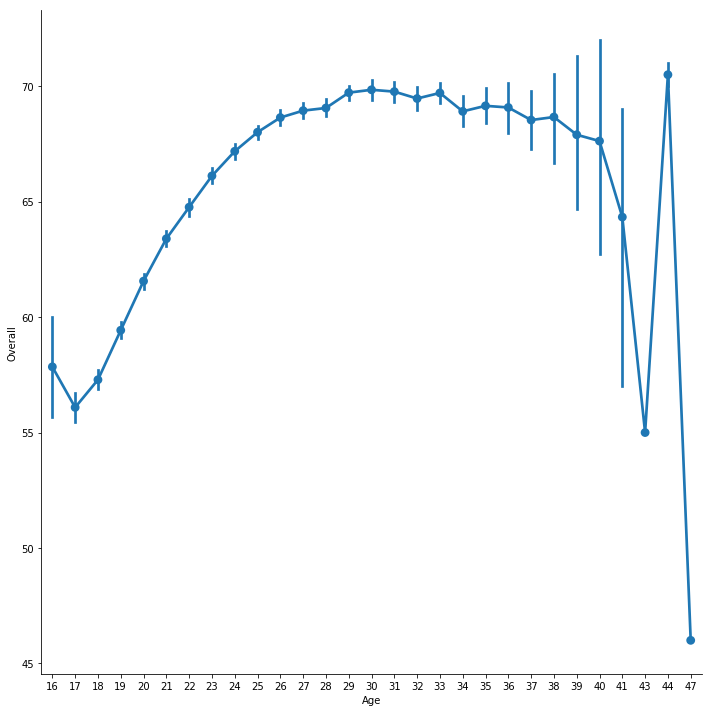

In [34]:
sns.factorplot('Age', 'Overall', data=player_attributes_df_enc, size=10);

Забелязваме някаква аномалия около 44 години. Нека видим какви са тези футболисти.

In [35]:
player_attributes_df_enc[player_attributes_df_enc['Age'] == 44][positions]

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
4839,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5314,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Явно са вратари. Понякога вратарите играят на добро ниво и в напреднала футболна възраст. Приемаме го за нормално.

In [36]:
player_attributes_df_enc['Value'].unique()

array(['€95.5M', '€105M', '€123M', '€97M', '€61M', '€92M', '€64.5M',
       '€90.5M', '€79M', '€77M', '€52M', '€83M', '€59M', '€67.5M', '€57M',
       '€69.5M', '€66.5M', '€38M', '€4.5M', '€75M', '€70.5M', '€44M',
       '€48M', '€40M', '€60M', '€34M', '€27M', '€36M', '€52.5M', '€65M',
       '€37.5M', '€48.5M', '€29M', '€29.5M', '€56M', '€56.5M', '€44.5M',
       '€47.5M', '€45M', '€40.5M', '€33M', '€46M', '€42.5M', '€43M',
       '€34.5M', '€25.5M', '€41M', '€22.5M', '€13.5M', '€10.5M', '€51.5M',
       '€46.5M', '€42M', '€24.5M', '€39M', '€22M', '€35.5M', '€30M',
       '€30.5M', '€43.5M', '€28.5M', '€25M', '€26M', '€5M', '€32M',
       '€39.5M', '€32.5M', '€31M', '€31.5M', '€35M', '€18.5M', '€28M',
       '€23M', '€21M', '€9M', '€11M', '€41.5M', '€38.5M', '€37M', '€27.5M',
       '€26.5M', '€20M', '€24M', '€0', '€23.5M', '€17.5M', '€16.5M',
       '€14.5M', '€19M', '€17M', '€6M', '€19.5M', '€15.5M', '€12.5M',
       '€3.5M', '€18M', '€21.5M', '€15M', '€20.5M', '€14M', '€6.5M',
    

Очевидно имаме някой футболисти, които струват милиони, някой хиляди а някой са доста евтини.
Нека превърнем тези стойности до числови.

In [37]:
player_attributes_df_enc['Value'] = data['Value'].apply(lambda x: float(x[1:-1]) * 10**6 if x[-1] == 'M' 
                                                         else float(x[1:-1]) * 10**3 if x[-1] == 'K'
                                                         else float(x[1:]))

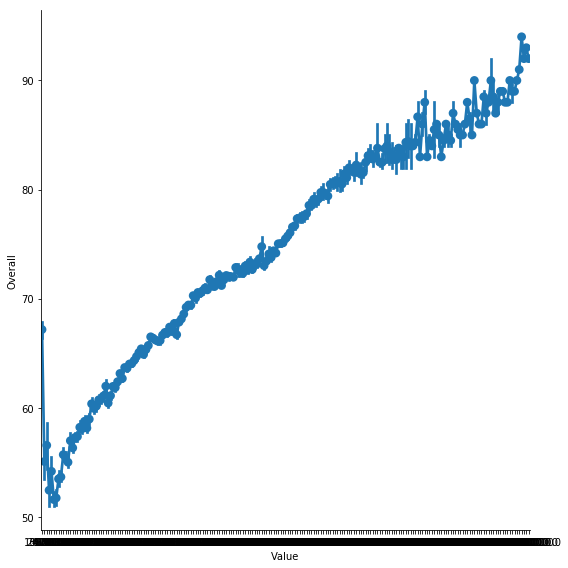

In [38]:
sns.factorplot('Value', 'Overall', data=player_attributes_df_enc, size=8);

Футболистите с висок рейтинг са скъпи. Закономерно. Но има футболисти с висок рейтинг и ниска цена. Нека видим дали има такив с цена €0.

In [39]:
player_attributes_df_enc[player_attributes_df_enc['Value'] == 0]['Overall'].mean()

67.171875

Ред е на заплатите.

In [40]:
player_attributes_df_enc['Wage'].unique()

array(['€565K', '€280K', '€510K', '€230K', '€355K', '€215K', '€295K',
       '€340K', '€275K', '€310K', '€285K', '€190K', '€265K', '€370K',
       '€325K', '€225K', '€110K', '€82K', '€150K', '€165K', '€210K',
       '€125K', '€175K', '€240K', '€130K', '€195K', '€160K', '€250K',
       '€220K', '€91K', '€260K', '€205K', '€120K', '€235K', '€135K',
       '€115K', '€94K', '€92K', '€77K', '€180K', '€46K', '€61K', '€155K',
       '€60K', '€145K', '€49K', '€81K', '€170K', '€105K', '€36K', '€96K',
       '€39K', '€84K', '€200K', '€69K', '€59K', '€54K', '€68K', '€38K',
       '€31K', '€53K', '€28K', '€37K', '€70K', '€78K', '€87K', '€58K',
       '€75K', '€21K', '€88K', '€89K', '€18K', '€56K', '€140K', '€100K',
       '€45K', '€0', '€25K', '€66K', '€15K', '€50K', '€27K', '€19K',
       '€73K', '€40K', '€65K', '€80K', '€62K', '€47K', '€67K', '€10K',
       '€35K', '€98K', '€76K', '€185K', '€20K', '€16K', '€43K', '€85K',
       '€95K', '€42K', '€64K', '€71K', '€99K', '€1K', '€51K', '€90K',
      

In [41]:
player_attributes_df_enc['Wage'] = data['Wage'].apply(lambda x: float(x[1:-1]) * 10**3 
                                                       if x[-1] == 'K'
                                                       else float(x[1:]))

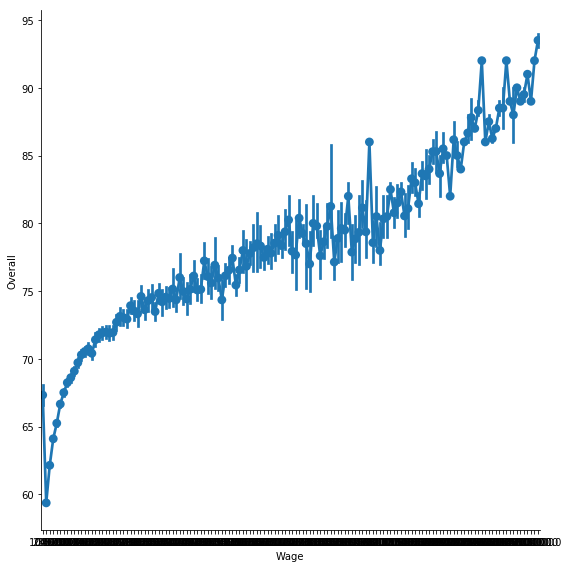

In [42]:
sns.factorplot('Wage', 'Overall', data=player_attributes_df_enc, size=8);

При заплатите положението изглежда същото. Нека видим колко получават заплата €0.

In [43]:
len(player_attributes_df_enc[player_attributes_df_enc['Wage'] == 0])

248

Нека тренираме отново.

In [44]:
(X, y) = data_and_target(player_attributes_df_enc)

X shape: (17981, 52), y shape (17981,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

y_train.mean(), y_test.mean()

(66.277864293659619, 66.158362989323848)

In [46]:
model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.891925148626
test score:  0.887699051188


Подобрихме с 1.5%.

Нека разгледаме колоната Special. Създава усещатането, че е просто сумата на всички атрибути. Нека проверим.

In [47]:
player_attributes_df_enc[attributes].sum(axis=1) - data['Special']

0        95
1        96
2        92
3        83
4        70
5        87
6        64
7        87
8        85
9        86
         ..
17971    44
17972    43
17973    35
17974    37
17975    42
17976    23
17977    44
17978    50
17979    45
17980    33
Length: 17981, dtype: int64

Нека приложим разликата на тези като наша колона за Special

In [48]:
player_attributes_df_enc['Special'] = player_attributes_df_enc[attributes].sum(axis=1) - data['Special']

Да тренираме.

In [49]:
(X, y) = data_and_target(player_attributes_df_enc)

X shape: (17981, 53), y shape (17981,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

y_train.mean(), y_test.mean()

(66.277864293659619, 66.158362989323848)

In [51]:
model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.892104287322
test score:  0.887905881394


Почти без промяна. Нека пробваме без футболистите оценени на €0 и със заплата €0.

In [52]:
player_attributes_df_enc = player_attributes_df_enc.drop(player_attributes_df_enc[player_attributes_df_enc['Value'] == 0].index)
player_attributes_df_enc = player_attributes_df_enc.drop(player_attributes_df_enc[player_attributes_df_enc['Wage'] == 0].index)

In [53]:
(X, y) = data_and_target(player_attributes_df_enc)

X shape: (17725, 53), y shape (17725,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

y_train.mean(), y_test.mean()

(66.293914090122627, 66.056859205776178)

In [55]:
model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.89379744897
test score:  0.888015053086


Почти без промяна. Нека пробваме някаква регуляризация.

In [56]:
alphas = [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

for alpha in alphas:
    model = Ridge(alpha = alpha).fit(X_train, y_train)
    print('alpha = ', alpha)
    print("train score:", model.score(X_train, y_train))
    print("test score: ", model.score(X_test, y_test))

alpha =  0.003
train score: 0.89379744897
test score:  0.888015036826
alpha =  0.01
train score: 0.893797448964
test score:  0.888014998893
alpha =  0.03
train score: 0.893797448916
test score:  0.888014890574
alpha =  0.1
train score: 0.893797448371
test score:  0.88801451214
alpha =  0.3
train score: 0.893797443631
test score:  0.888013436739
alpha =  1
train score: 0.893797391496
test score:  0.888009739192
alpha =  3
train score: 0.893796973628
test score:  0.88799970187
alpha =  10
train score: 0.893793297826
test score:  0.887969374066
alpha =  30
train score: 0.893772761939
test score:  0.887903575497
alpha =  100
train score: 0.893636087168
test score:  0.887699758937


Без промяна. Lasso?

In [57]:
alphas = [0.0001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

for alpha in alphas:
    lasso = Lasso(alpha = alpha, max_iter=100000).fit(X_train, y_train)
    print('alpha = ', alpha)
    print("Features used:  {}/{}".format(np.sum(lasso.coef_ != 0), np.shape(X_train)[1]))
    print("train score:", lasso.score(X_train, y_train))
    print("test score: ", lasso.score(X_test, y_test))

alpha =  0.0001
Features used:  53/53
train score: 0.893797284863
test score:  0.888003862365
alpha =  0.003
Features used:  50/53
train score: 0.893705037664
test score:  0.887730226265
alpha =  0.01
Features used:  48/53
train score: 0.893409438302
test score:  0.88743715736
alpha =  0.03
Features used:  44/53
train score: 0.892057302515
test score:  0.885882729824
alpha =  0.1
Features used:  38/53
train score: 0.884933747369
test score:  0.87868251053
alpha =  0.3
Features used:  32/53
train score: 0.872081794039
test score:  0.865480869812
alpha =  1
Features used:  26/53
train score: 0.867974476791
test score:  0.861755217545
alpha =  3
Features used:  19/53
train score: 0.849638673479
test score:  0.844491297638
alpha =  10
Features used:  7/53
train score: 0.749549093572
test score:  0.74836826899


Регуляризацията не помогна. Нека пробваме с гора.

In [58]:
forest = RandomForestRegressor(criterion='mse',
                              min_samples_leaf=3,
                              min_samples_split=3,
                              max_depth=50,
                              n_estimators=20)
forest.fit(X_train, y_train)

print('train score: {}'.format(forest.score(X_train, y_train)))
print('test score: {}'.format(forest.score(X_test, y_test)))

train score: 0.9978202679620627
test score: 0.9926056918597362


Явно нашата гора разгада тайната формула на [EA sports](https://en.wikipedia.org/wiki/EA_Sports) за изчисляване на рейтинга на футболистите в играта.

Нека видим теглата на feature-ите.

In [59]:
def linear_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_, orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

Преди това да нормализираме всички feature-и, за да видидим равнопоставени тегла.

In [60]:
player_attributes_df_norm = (player_attributes_df_enc - player_attributes_df_enc.mean()) / (player_attributes_df_enc.max() - player_attributes_df_enc.min())

(X, y) = data_and_target(player_attributes_df_norm)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

model = LinearRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))


X shape: (17725, 53), y shape (17725,)
train score: 0.89379744897
test score:  0.888015053086


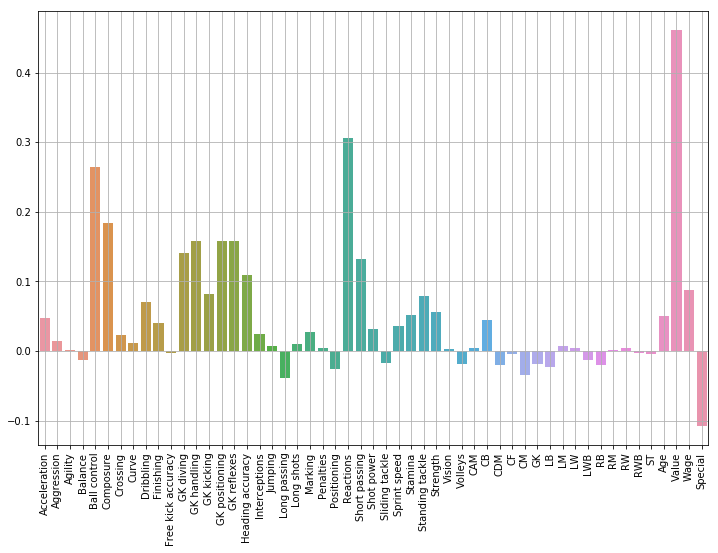

In [61]:
linear_regression_features(X, model);